In [1]:
pip install wordcloud 


In [2]:
pip install numpy==1.23.4 --user


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

C:\Users\ADMIN\anaconda3\envs\fc\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
%matplotlib inline


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [8]:
path = r"C:\Users\ADMIN\Downloads\spam.csv"
messages = pd.read_csv(path, header=0,usecols=['v1', 'v2'], encoding='latin-1')
messages[:3]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
messages.describe()


,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

      v1                                                 v2
102  ham  As per your request 'Melle Melle (Oru Minnamin...
153  ham  As per your request 'Melle Melle (Oru Minnamin...
206  ham  As I entered my cabin my PA said, '' Happy B'd...
222  ham                             Sorry, I'll call later
325  ham                   No calls..messages..missed calls


In [11]:
messages.groupby('v1').describe().T


v1                            ham  \
v2 count                     4825   
   unique                    4516   
   top     Sorry, I'll call later   
   freq                        30   

v1                                                      spam  
v2 count                                                 747  
   unique                                                653  
   top     Please call our customer service representativ...  
   freq                                                    4

In [12]:
ham_msg = messages[messages.v1 =='ham']
spam_msg = messages[messages.v1=='spam']

In [13]:
ham_msg_txt = " ".join(ham_msg.v2.to_numpy().tolist())
spam_msg_txt = " ".join(spam_msg.v2.to_numpy().tolist())

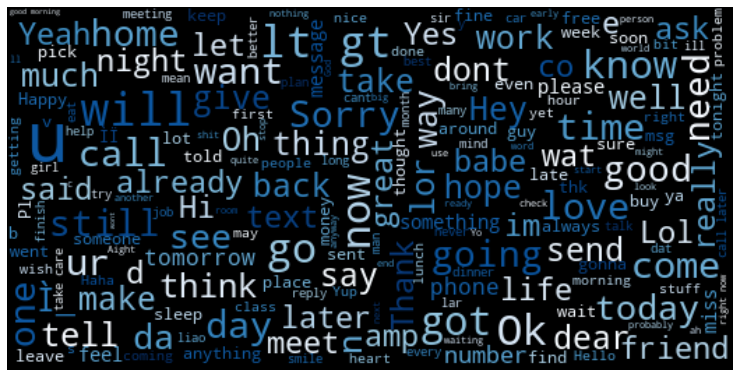

In [14]:
ham_msg_wcloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_txt)
plt.figure(figsize=(13,9))
plt.imshow(ham_msg_wcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

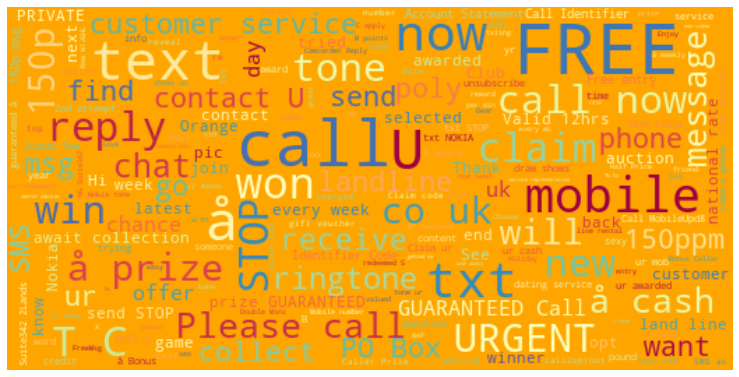

In [15]:
spam_msg_wcloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="orange", colormap='Spectral_r').generate(spam_msg_txt)
plt.figure(figsize=(13,9))
plt.imshow(spam_msg_wcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

15.481865284974095

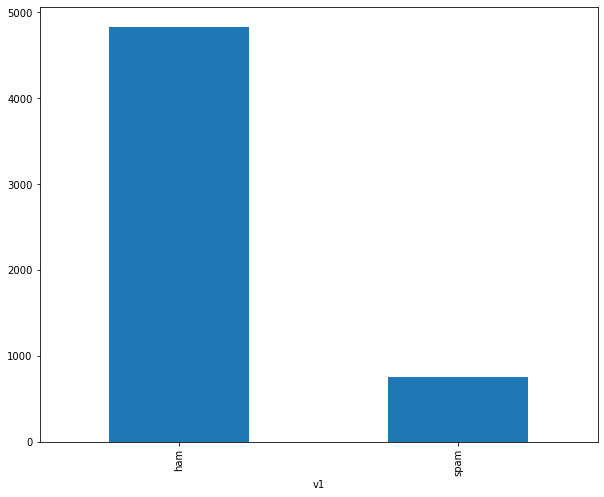

In [16]:
plt.figure(figsize=(10,8))
counts = messages.groupby('v1').size()
counts.plot.bar()
(len(spam_msg)/len(ham_msg))*100

(747, 2) (747, 2)


Text(0.5, 0, 'Message labels')

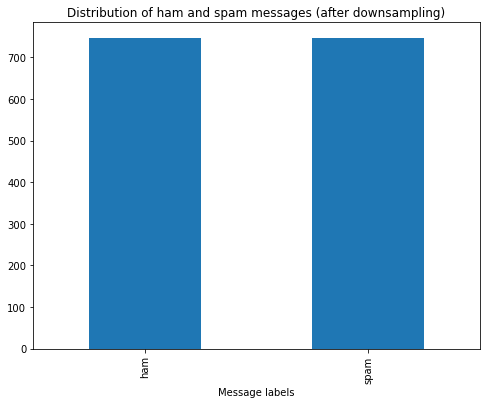

In [17]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg

print(ham_msg_df.shape, spam_msg_df.shape)

msg_df = pd.concat([ham_msg_df, spam_msg_df], ignore_index=True)
plt.figure(figsize=(8,6))
counts = msg_df.groupby('v1').size()
counts.plot.bar()
plt.title('Distribution of ham and spam messages (after downsampling)')
plt.xlabel('Message labels')

In [18]:
msg_df['text_length'] = msg_df['v2'].apply(len)
labels = msg_df.groupby('v1').mean(numeric_only=True)
labels

,text_length
v1,
ham,69.626506
spam,138.866131


In [19]:
msg_df['msg_type']= msg_df['v1'].map({'ham': 0, 'spam': 1})
msg_v1 = msg_df['msg_type'].values

In [20]:
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['v2'], msg_v1, test_size=0.2, random_state=434)


In [21]:
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [22]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [23]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'now': 11,
 'is': 12,
 '2': 13,
 'and': 14,
 'free': 15,
 'in': 16,
 'or': 17,
 'have': 18,
 'on': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 'with': 23,
 'are': 24,
 '4': 25,
 'from': 26,
 'me': 27,
 'text': 28,
 'get': 29,
 'stop': 30,
 'mobile': 31,
 'my': 32,
 'this': 33,
 'be': 34,
 'just': 35,
 'claim': 36,
 'only': 37,
 'it': 38,
 'reply': 39,
 'that': 40,
 'www': 41,
 'no': 42,
 'out': 43,
 'will': 44,
 'at': 45,
 'we': 46,
 'do': 47,
 'so': 48,
 'send': 49,
 'our': 50,
 'not': 51,
 'prize': 52,
 'new': 53,
 'if': 54,
 'cash': 55,
 'but': 56,
 'go': 57,
 'can': 58,
 '150p': 59,
 'up': 60,
 'uk': 61,
 "i'm": 62,
 'please': 63,
 'nokia': 64,
 'who': 65,
 'win': 66,
 't': 67,
 'won': 68,
 '1': 69,
 'all': 70,
 'tone': 71,
 'what': 72,
 'week': 73,
 'com': 74,
 'been': 75,
 'msg': 76,
 'want': 77,
 'phone': 78,
 'know': 79,
 '50': 80,
 'service': 81,
 'by': 82,
 'urgent': 83,
 '

In [24]:
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 4054 unique tokens in training data. 


In [25]:
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [26]:
vocab_size = 500 
embeding_dim = 16
drop_value = 0.2 
n_dense = 24
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])


In [29]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)


Epoch 1/30
38/38 - 1s - loss: 0.6851 - accuracy: 0.6234 - val_loss: 0.6768 - val_accuracy: 0.6890
Epoch 2/30
38/38 - 0s - loss: 0.6637 - accuracy: 0.7757 - val_loss: 0.6474 - val_accuracy: 0.7826
Epoch 3/30
38/38 - 0s - loss: 0.6221 - accuracy: 0.8134 - val_loss: 0.5944 - val_accuracy: 0.8194
Epoch 4/30
38/38 - 0s - loss: 0.5526 - accuracy: 0.8561 - val_loss: 0.5232 - val_accuracy: 0.8395
Epoch 5/30
38/38 - 0s - loss: 0.4722 - accuracy: 0.8812 - val_loss: 0.4506 - val_accuracy: 0.8696
Epoch 6/30
38/38 - 0s - loss: 0.4054 - accuracy: 0.8929 - val_loss: 0.3878 - val_accuracy: 0.8796
Epoch 7/30
38/38 - 0s - loss: 0.3472 - accuracy: 0.9004 - val_loss: 0.3338 - val_accuracy: 0.8896
Epoch 8/30
38/38 - 0s - loss: 0.2986 - accuracy: 0.9188 - val_loss: 0.2880 - val_accuracy: 0.9064
Epoch 9/30
38/38 - 0s - loss: 0.2628 - accuracy: 0.9180 - val_loss: 0.2509 - val_accuracy: 0.9130
Epoch 10/30
38/38 - 0s - loss: 0.2231 - accuracy: 0.9314 - val_loss: 0.2172 - val_accuracy: 0.9231
Epoch 11/30
38/38 -

In [30]:
model.evaluate(testing_padded, test_labels)


10/10 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9732


[0.08806431293487549, 0.9732441306114197]

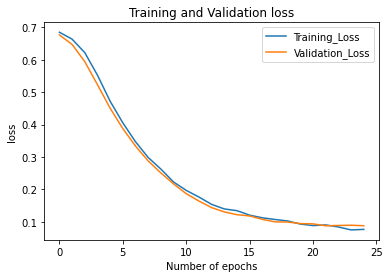

In [31]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

In [36]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_spam(predict_msg)

array([[0.00236657],
       [0.01167876],
       [0.99985564]], dtype=float32)

# 0.99985564 shows that the message was 99% spam 